In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from fastai import *
from fastai.vision import *

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['vinchucas y otros']


In [2]:
!cp -r '/kaggle/input/vinchucas y otros' /kaggle/working/datos

In [3]:
import torch
print(torch.__version__)
import fastai
print(fastai.__version__)

1.1.0
1.0.55


In [4]:
# remuevo las imágenes en varios ya que no las usaremos para esta red
!rm  datos/varios/*
!rmdir datos/varios

In [5]:
clases = ['No Vinchuca', 'Vinchuca']
path = Path('/kaggle/working/datos')

In [6]:
np.random.seed(54)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(flip_vert=True), size=224, num_workers=0).normalize(imagenet_stats)

In [7]:
data.classes

['No Vinchuca', 'Vinchuca']

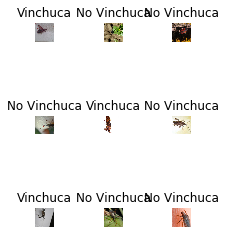

In [8]:
data.show_batch(rows=3, figsize=(3,4))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 24324198.35it/s]


In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.809499,0.610855,0.297872,00:06
1,0.627439,0.255765,0.106383,00:04
2,0.540868,0.189837,0.085106,00:04
3,0.469291,0.174127,0.085106,00:04


In [11]:
learn.save('stage-1')

In [12]:
ls  ../working/datos/models --size

total 89712
89712 stage-1.pth


In [13]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


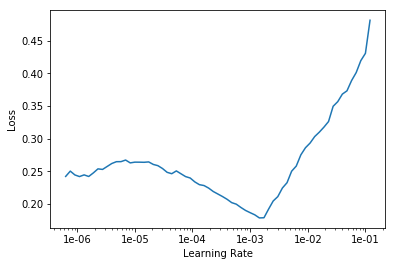

In [14]:
learn.lr_find()
learn.recorder.plot()


In [15]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.325375,0.170646,0.053191,00:05
1,0.261253,0.179412,0.106383,00:05
2,0.266446,0.174194,0.074468,00:05
3,0.248797,0.173102,0.095745,00:05


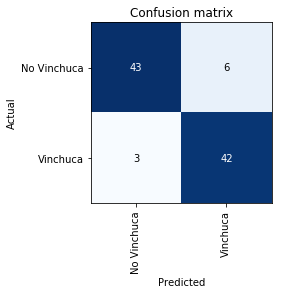

In [16]:
learn.save('stage-2')
learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [17]:
learn.export('sinvarios.pkl')